### kNN基础

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:

raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [54]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [55]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

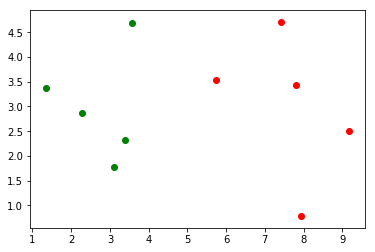

In [56]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.show()

In [57]:
x = np.array([5.093607318, 3.365731514])

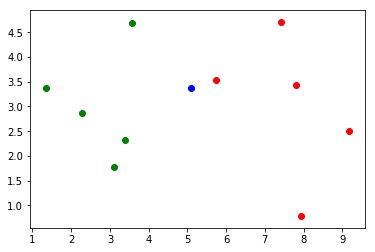

In [58]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.scatter(x[0],x[1],color='b')
plt.show()

### kNN的过程

In [59]:
from math import sqrt
distances = []
for x_train in X_train:  # 遍历X_train 
    d = sqrt(np.sum((x_train  - x) ** 2)) # 求所有遍历的值
    distances.append(d)

In [60]:
distances

[1.990064219622496,
 2.5385173575483404,
 3.749799408910056,
 2.002301776868819,
 2.8571121057229747,
 2.6831160473189035,
 0.6728231726201324,
 4.167139972334663,
 2.6998069464673695,
 3.837563375328557]

In [61]:
np.argsort(distances) # 排序求索引 ，按照距离排序得到下标

array([6, 0, 3, 1, 5, 8, 4, 2, 9, 7], dtype=int64)

In [62]:
nearest = np.argsort(distances)

In [63]:
k = 6

In [64]:
topK_y = [y_train[i] for i in nearest[:k]] # 从近到远的前k个元素

In [65]:
topK_y

[1, 0, 0, 0, 1, 1]

In [66]:
from collections import Counter # 求数据统计

In [67]:
Counter(topK_y) # 统计topK_y中对于数的个数

Counter({0: 3, 1: 3})

In [68]:
votes = Counter(topK_y)

In [69]:
votes.most_common(1) # 找出票数最多的1个元素

[(1, 3)]

In [70]:
votes.most_common(1)[0][0]

1

In [71]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

### 使用scikit-learn中的kNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier # 导入kNN算法的模块

In [77]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6) # 参数为kNN中的k的值

In [79]:
NN_classifier.fit(X_train,y_train)  # 拟合训练数据集

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [81]:
x = np.array([5.093607318, 3.365731514])
kNN_classifier.predict(x) # 传入的参数必须整理成矩阵的形式 不然会报

ValueError: Expected 2D array, got 1D array instead:
array=[5.09360732 3.36573151].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
X_presict = x.reshape(1,-1)

In [83]:
X_predict # 将数据向量转为矩阵

array([[5.09360732, 3.36573151]])

In [84]:
kNN_classifier.predict(X_predict)

array([0])

In [85]:
y_predict = kNN_classifier.predict(X_predict)

In [86]:
y_predict[0]

0

### 整理kNN代码

In [ ]:
%run 